In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

/kaggle/input
/kaggle/input/melanoma
/kaggle/input/melanoma/dermmel
/kaggle/input/melanoma/dermmel/DermMel
/kaggle/input/melanoma/dermmel/DermMel/train_sep
/kaggle/input/melanoma/dermmel/DermMel/train_sep/NotMelanoma
/kaggle/input/melanoma/dermmel/DermMel/train_sep/Melanoma
/kaggle/input/melanoma/dermmel/DermMel/valid
/kaggle/input/melanoma/dermmel/DermMel/valid/NotMelanoma
/kaggle/input/melanoma/dermmel/DermMel/valid/Melanoma
/kaggle/input/melanoma/dermmel/DermMel/test
/kaggle/input/melanoma/dermmel/DermMel/test/NotMelanoma
/kaggle/input/melanoma/dermmel/DermMel/test/Melanoma
/kaggle/input/melanoma/DermMel
/kaggle/input/melanoma/DermMel/train_sep
/kaggle/input/melanoma/DermMel/train_sep/NotMelanoma
/kaggle/input/melanoma/DermMel/train_sep/Melanoma
/kaggle/input/melanoma/DermMel/valid
/kaggle/input/melanoma/DermMel/valid/NotMelanoma
/kaggle/input/melanoma/DermMel/valid/Melanoma
/kaggle/input/melanoma/DermMel/test
/kaggle/input/melanoma/DermMel/test/NotMelanoma
/kaggle/input/melanoma/De

In [2]:
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.applications import VGG16
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def plot_training_curves(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)


    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss', color="r", linestyle = ":")
    plt.plot(epochs, val_loss, 'b', label='Validation loss', color="g" )
    
    plt.legend()
    plt.figure()
    
    plt.title('Training and validation accuracy')
    plt.plot(epochs, acc, 'bo', label='Training acc', color="b", linestyle = ":")
    plt.plot(epochs, val_acc, 'b', label='Validation acc', color="g")
    
    plt.legend()
    plt.figure()
    
    plt.show()

def print_evaluation(loss_value, accuracy_value):
    print ('Loss value: ', loss_value)
    print ('Accuracy value: ', accuracy_value)

    
def print_results(cm):
    tp = cm[0][0] 
    tn = cm[1][1]
    fn = cm[0][1]
    fp = cm[1][0]
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1_score = ((2*precision*recall) / (recall+precision)) * 100
    print("Accuracy: %f \n Sensitivity : %f \n Specificity: %f \n F1 Score: %f" %(accuracy,sensitivity,specificity,f1_score))
    

def fine_tune_vgg():
    vgg16_model = VGG16(include_top=False, weights='imagenet')
    x = vgg16_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    predictions = Dense(2, activation='softmax')(x)

    model = Model(inputs=vgg16_model.input, outputs=predictions)
   
    for layer in model.layers[:17]:
        layer.trainable = False
    for layer in model.layers[17:]:
        layer.trainable = True

    return model

def save_model(model, file_path):
    model_json = model.to_json()
    with open('model.json', 'w') as json_file:
        json_file.write(model_json)
    
def train_network(model, class_weights, val_steps, callbacks, training_path, validation_path, val_batch_size, train_steps):
    

    return model.fit_generator(train_batches,
                              steps_per_epoch = train_steps,
                              class_weight = class_weights,
                              validation_data = valid_batches,
                              validation_steps = val_steps,
                              epochs = 1,
                              verbose = 1,
                              callbacks = callbacks)


def fine_tune_vgg16(train_batches, train_steps, class_weight, valid_batches, val_steps, file_path, callbacks):
    
    vgg16_model = VGG16(include_top=False, weights='imagenet')
    
    x = Conv2D(filters = 16, kernel_size = 3 , activation = 'relu', input_shape = (299, 299, 3))
    
    x = Conv2D(filters = 32, kernel_size = 3 , activation = 'relu')
    
    x = Conv2D(filters = 64, kernel_size = 3 , activation = 'relu')
    
    x = Conv2D(filters = 128, kernel_size = 3 , activation = 'relu')
    
    x = MaxPooling2D(pool_size = 3)
    
    x = vgg16_model.output
    
    x = Dropout(0.2)(x)
    
    x = Dense(128, activation='relu')(x)
    
    x = GlobalAveragePooling2D()(x)
    
    x = Dropout(0.2)(x)

    predictions = Dense(2, activation='softmax')(x)

    model = Model(inputs=vgg16_model.input, outputs=predictions)
   
    
    model.compile(Adam(lr = 0.000095), loss = 'categorical_crossentropy', metrics = ['accuracy'])

    model.fit_generator(train_batches,
                              steps_per_epoch = train_steps,
                              class_weight = class_weights,
                              validation_data = valid_batches,
                              validation_steps = val_steps,
                              epochs = 50,
                              verbose = 1,
                              callbacks = callbacks)

    for layer in model.layers[:17]: layer.trainable = False
        
    for layer in model.layers[17:]: layer.trainable = True


    model.compile(Adam(lr = 0.000095), loss = 'categorical_crossentropy', metrics = ['accuracy'])


    history = model.fit_generator(train_batches,
                              steps_per_epoch = train_steps,
                              class_weight = class_weights,
                              validation_data = valid_batches,
                              validation_steps = val_steps,
                              epochs = 50,
                              verbose = 1,
                              callbacks = callbacks)

    return model, history
    
    
    

Using TensorFlow backend.


In [3]:

file_path = 'weights.h5'


training_path = '/kaggle/input/melanoma/dermmel/DermMel/train_sep'
validation_path = '/kaggle/input/melanoma/dermmel/DermMel/valid'
test_path = '/kaggle/input/melanoma/dermmel/DermMel/test'

num_train_samples = 10682
num_val_samples = 3562
num_test_samples = 3562

# 8, 16, 32, 64, 128
train_batch_size = 16
val_batch_size = 16
test_batch_size = 16

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)
test_steps = np.ceil(num_val_samples / val_batch_size)

class_weights = {
        0: 5.1, # melanoma
        1: 1.0 # non-melanoma
}

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(training_path,
                                    target_size = (299, 299),
                                    batch_size = val_batch_size,
                                    class_mode = 'categorical')
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(validation_path,
                                    target_size = (299, 299),
                                    batch_size = val_batch_size,
                                    class_mode = 'categorical')


test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path,
                                    target_size = (299, 299),
                                    batch_size = test_batch_size,
                                    class_mode = 'categorical',
                                    shuffle = False)
                                    

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [4]:
callbacks = [
        ModelCheckpoint(file_path, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max'),
    
        ReduceLROnPlateau(monitor = 'val_acc', factor = 0.5, patience = 10, verbose = 1, mode = 'max', min_lr = 0.0000314159265359),
        EarlyStopping(monitor = 'val_loss', min_delta = 1e-10, patience = 50, verbose = 1)
        ]

model, history = fine_tune_vgg16(train_batches, train_steps, class_weights, valid_batches, val_steps, file_path, callbacks)
save_model(model, file_path)


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
668/668 [==============================] - 214s 320ms/step - loss: 0.7998 - acc: 0.7615 - val_loss: 0.2578 - val_acc: 0.8939

Epoch 00001: val_acc improved from -inf to 0.89388, saving model to weights.h5
Epoch 2/50
668/668 [==============================] - 183s 274ms/step - loss: 0.5670 - acc: 0.8368 - val_loss: 0.3470 - val_acc: 0.8481

Epoch 00002: val_acc did not improve from 0.89388
Epoch 3/50
668/668 [==============================] - 184s 275ms/step - loss: 0.4964 - acc: 0.8613 - val_loss: 0.6592 - val_acc: 0.7184

Epoch 00003: val_acc did not improve from 0.89388
Epoch 4/50
668/668 [==============================] - 183s 274ms/step - loss: 0.4808 - acc: 0.8775 - val_loss:

223/223 [==============================] - 45s 202ms/step
Accuracy: 0.948329 
 Sensitivity : 0.936552 
 Specificity: 0.960112 
 F1 Score: 94.772727
Confusion matrix, without normalization
[[1668  113]
 [  71 1709]]


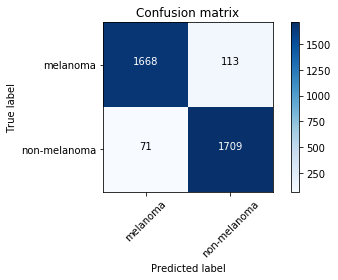

In [5]:
# classes MELANOMA, NON-MELANOMA
test_labels = test_batches.classes

predictions = model.predict_generator(test_batches, steps = val_steps, verbose = 1)

cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

print_results(cm)

plot_confusion_matrix(cm, ['melanoma', 'non-melanoma'])